In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('Parkinson_Sentiment_Polarity.csv')
data.head(10)

,Unnamed: 0,Reviewer,Date,Rating,Reviews,Polarity,Sentiment
0,0,Priya Soni,28-Nov-20,Rated 1 stars out of five stars,Worst experience and worst app to buy products...,-0.550000,Strong Negative
1,1,Anushka Makwana,27-Nov-20,Rated 1 stars out of five stars,I love zara clothes but the app is just opposi...,-0.261035,Negative
2,2,Upasana Choudhry,26-Nov-20,Rated 1 stars out of five stars,"Have major bugs. Placed an order, made UPI pay...",-0.106250,Negative
3,3,Redmi 3S Prime,17-Nov-20,Rated 2 stars out of five stars,This app takes longer time to load and open. I...,0.300000,Positive
4,4,Giang Nguyen,26-Nov-20,Rated 2 stars out of five stars,I tried to create the account (from Finland) s...,-0.075000,Negative
5,5,Siyavuya Mzili,29-Nov-20,Rated 1 stars out of five stars,Only 2 days after i had purchased an item and ...,-0.029762,Negative
6,6,monika sain,7-Nov-20,Rated 1 stars out of five stars,My experience with the app and store is worst....,-0.053810,Negative
7,7,Skand,26-Nov-20,Rated 1 stars out of five stars,The app glitched out on the black Friday eveni...,-0.055556,Negative
8,8,Claire Wilkinson,17-Nov-20,Rated 1 stars out of five stars,Really hate the browsing format - I don't want...,-0.020000,Negative
9,9,Shamina Ejaz,21-Nov-20,Rated 1 stars out of five stars,Doesn't give good options for return policy pl...,0.268750,Positive


In [7]:
import nltk
import re
import string
from nltk.corpus import stopwords
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()
corpus = []
for i in range(0, len(data)):
    title = re.sub('[^a-zA-Z]', ' ', data['Reviews'][i]) #Remove special charactor and numbers
    title = title.lower()
    title = title.split() #split to every word from santance
    
    title = [ps.stem(word) for word in title if not word in stopwords.words('english')] #remove stopwords(is, ara, am)
    title= [char for char in title if char not in string.punctuation]
    title = ' '.join(title) #Join all title into a string
    corpus.append(title)

In [8]:
corpus

['worst experi worst app buy product provid servic return product put return request purchas nov till one came pickup call custom care give repli request put call hold resolv issu cut call wast rs want experi think thrice place order',
 'love zara cloth app opposit even option cancel order first purchas app want cancel order go pickup product store custom servic slow pathet even product store want wanna cancel order take long discuss case mean discuss refund money disappoint',
 'major bug place order made upi payment return app show order cancel messag one hand payment debit recognis app wors support avail issu chat option time mention one get impress x keep wast time tri get respons nit even chat bot inform outsid servic hour realli bad experi shop app',
 'app take longer time load open need mani improv like price wishlist product appear must price drop alert wishlist product cannot miss howev product longer avail must display stock hope featur',
 'tri creat account finland sever time

In [9]:
from sklearn.feature_extraction.text import CountVectorizer


#Creating the bag of words
bow_transfarmer = CountVectorizer().fit(corpus) #convert all santance into vector form
b=bow_transfarmer.vocabulary_ # tells whic perticular number assign to which word
b



{'worst': 3099,
 'experi': 944,
 'app': 137,
 'buy': 389,
 'product': 2108,
 'provid': 2126,
 'servic': 2396,
 'return': 2298,
 'put': 2144,
 'request': 2270,
 'purchas': 2138,
 'nov': 1836,
 'till': 2770,
 'one': 1882,
 'came': 397,
 'pickup': 2005,
 'call': 396,
 'custom': 637,
 'care': 411,
 'give': 1152,
 'repli': 2264,
 'hold': 1279,
 'resolv': 2281,
 'issu': 1429,
 'cut': 638,
 'wast': 3021,
 'rs': 2326,
 'want': 3012,
 'think': 2745,
 'thrice': 2755,
 'place': 2018,
 'order': 1898,
 'love': 1605,
 'zara': 3144,
 'cloth': 492,
 'opposit': 1893,
 'even': 905,
 'option': 1895,
 'cancel': 403,
 'first': 1029,
 'go': 1161,
 'store': 2602,
 'slow': 2491,
 'pathet': 1959,
 'wanna': 3011,
 'take': 2686,
 'long': 1590,
 'discuss': 764,
 'case': 416,
 'mean': 1681,
 'refund': 2226,
 'money': 1746,
 'disappoint': 753,
 'major': 1639,
 'bug': 375,
 'made': 1630,
 'upi': 2927,
 'payment': 1964,
 'show': 2439,
 'messag': 1704,
 'hand': 1224,
 'debit': 670,
 'recognis': 2202,
 'wors': 3098,
 '

In [10]:
bow_title= bow_transfarmer.transform(data['Reviews']) #words encoded to numbers
bow_title.todense()  #todense() gives array 


matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
print(bow_title[1, :]) 
#0 means first row
#137 mean word in number
#2 means two time come in document

  (0, 137)	2
  (0, 403)	3
  (0, 416)	1
  (0, 764)	2
  (0, 905)	2
  (0, 1029)	1
  (0, 1161)	1
  (0, 1590)	1
  (0, 1605)	1
  (0, 1681)	1
  (0, 1746)	1
  (0, 1895)	1
  (0, 1898)	3
  (0, 2005)	1
  (0, 2108)	2
  (0, 2226)	1
  (0, 2491)	1
  (0, 2509)	2
  (0, 2602)	2
  (0, 2736)	1
  (0, 3011)	1
  (0, 3012)	1
  (0, 3049)	1
  (0, 3144)	1


In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

tfid_transfarmer = TfidfTransformer().fit(bow_title)
tfid_transfarmer

title_tfidf=tfid_transfarmer.transform(bow_title)
print(title_tfidf[1, :])   


  (0, 3144)	0.13602032298297856
  (0, 3049)	0.09808488304024722
  (0, 3012)	0.11237247676933187
  (0, 3011)	0.20158620005682368
  (0, 2736)	0.09474990106488777
  (0, 2602)	0.22721962550388944
  (0, 2509)	0.16511840361615904
  (0, 2491)	0.1255273455409722
  (0, 2226)	0.138462500257808
  (0, 2108)	0.2457940370330662
  (0, 2005)	0.19559581357881153
  (0, 1898)	0.2791461479785311
  (0, 1895)	0.11683513948368315
  (0, 1746)	0.1232573653830151
  (0, 1681)	0.18656306885187995
  (0, 1605)	0.08841054389879688
  (0, 1590)	0.1466149878135222
  (0, 1161)	0.11237247676933187
  (0, 1029)	0.1280071478233278
  (0, 905)	0.18752927355827506
  (0, 764)	0.440388080094036
  (0, 416)	0.20158620005682368
  (0, 403)	0.46746447009118847
  (0, 137)	0.09473954842682933


# every word with its interger value(how most import greator>value)

In [13]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(title_tfidf,data['Sentiment'])


In [14]:
all_prediction= model.predict(title_tfidf)
all_prediction

array(['Negative', 'Positive', 'Negative', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U15')

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(data['Sentiment'],all_prediction)

0.5268256333830105

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(data['Sentiment'], all_prediction)

#pass y_test, y_pridct

array([[233,   0, 344,   0,   0],
       [ 23, 126, 385,   0,   2],
       [  2,   1, 988,   0,   3],
       [ 87,   2, 102,   0,   0],
       [  0,   0, 319,   0,  67]], dtype=int64)

# confusion_matrix is  error matrix, is a specific table layout that allows visualization of the performance of an algorithm.

#

In [17]:
from sklearn.metrics import classification_report
classification_report(data['Sentiment'], all_prediction)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'                 precision    recall  f1-score   support\n\n       Negative       0.68      0.40      0.51       577\n        Neutral       0.98      0.24      0.38       536\n       Positive       0.46      0.99      0.63       994\nStrong Negative       0.00      0.00      0.00       191\nStrong Positive       0.93      0.17      0.29       386\n\n       accuracy                           0.53      2684\n      macro avg       0.61      0.36      0.36      2684\n   weighted avg       0.65      0.53      0.46      2684\n'

<function matplotlib.pyplot.show(close=None, block=None)>

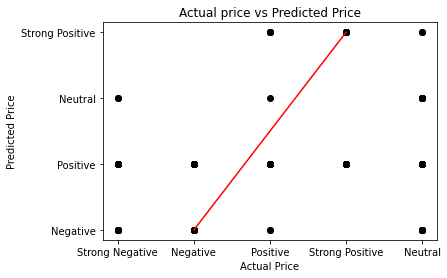

In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(data['Sentiment'], all_prediction, color='black')

x0=min(data['Sentiment'])
x1=max(data['Sentiment'])
y0=min(all_prediction)
y1=max(all_prediction)
plt.plot([x0,x1],[y0,y1], color="red")


#add Labels
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price")

plt.show
